In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    lambdify,
)
init_printing()
import numpy as np
from matplotlib import cm

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import *
from nelder_mead import NelderMead

## tmp_min_sup = infの時

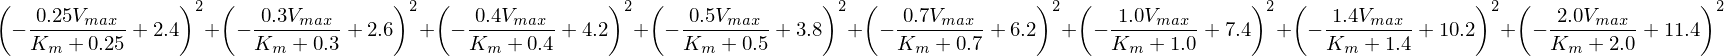

In [2]:
S_v_list = [
    [0.25, 2.4],
    [0.30, 2.6],
    [0.40, 4.2],
    [0.50, 3.8],
    [0.70, 6.2],
    [1.00, 7.4],
    [1.40, 10.2],
    [2.00, 11.4],    
]


K_m, V_max = args = var("K_m V_max ")
f_expr = 0

for S, v in S_v_list:
    f_expr += (v - (1/(K_m + S)) * V_max * S) ** 2
    

f_expr

[[  3.42241117  44.61267118]
 [  1.94266599  31.71828727]
 [  3.22316091  38.57749409]]
1.51005208625


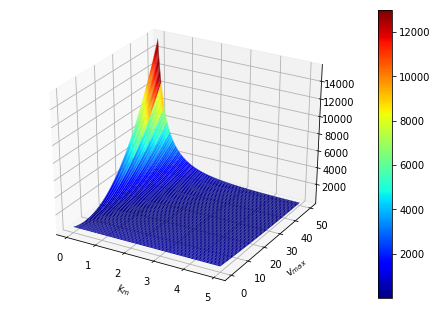

In [3]:
np_func = lambdify([args], f_expr, modules=np)
# seed_num = 12345
# np.random.seed(seed_num)
low = 0
high = 50.1
points = np.random.uniform(low=low, high=high, size=(3,2))
div_num = 10.0
points[:, 0] /= div_num
print points
nelder = NelderMead(np_func, points)
local_minima = np.inf

x = np.arange(low/div_num, high/div_num, 0.2/div_num) 
y = np.arange(low, high, 0.2) 
X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis].tolist()
Z = np.array([np_func(_args) for _args in args_list]).reshape(X.shape)

#nelder.save_figs(X, Y, Z, points_history)

points_histories = []
for i in range(20):
    points = np.random.uniform(low=low, high=high, size=(3,2))
    points[:, 0] /= div_num
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run(50)
    points_histories.append(points_history)
    local_minima = min(local_minima, _local_minima)
points_histories = np.array(points_histories)
print local_minima

# nelder.save_multi_points_figs(X, Y, np.log(Z), points_histories)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X,Y,Z, rstride=3, cstride=5, cmap=cm.jet, linewidth=1) 
fig.colorbar(surf)
plt.xlabel('$k_m$')
plt.ylabel('$v_{max}$')
plt.show()

In [4]:
# X = ip([[interval[0, 10]],[interval[15, 40]]]) # K, S

X = ip([[interval[0, 5]],[interval[0, 50]]]) # K, S

In [5]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

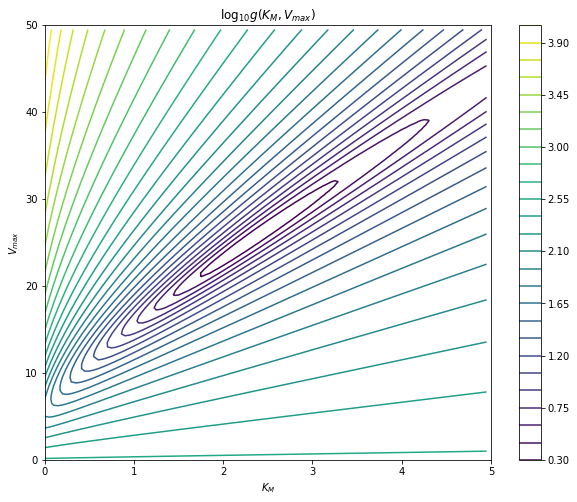

In [6]:
K, V ,Z, K_lim, V_lim = calc_f_meshgrid(f, X)
fig = plt.figure(figsize=(10, 8))
#plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(K_lim)
plt.ylim(V_lim)
plt.xlabel('$K_M$')
plt.ylabel('$V_{max}$')
plt.title('$\log_{10} g(K_M, V_{max})$')
#im = plt.contour(K, V, np.log10(Z), levels=np.arange(0.5, 4, 0.5), shading='gouraud')
im = plt.contour(K, V, np.log10(Z), 30, shading='gouraud')
fig.colorbar(im)
plt.show()


In [10]:
krawczyk = Krawczyk(df, ddf, X)
local_minima = np.inf
%time _1, _2, _3, _4, animation_box = krawczyk.find_global_minimum(\
                                                             f,trace=False, cnt_max=3000, tmp_min_sup=local_minima)
#visualize_optimization_log(krawczyk, f, animation_box, skip=25, zscale='log10')

Loop end. cnt:1734, len(S):0, len(T):4, len(U):0

1734
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([2.3263150513399125, 2.326315051339914])],
  [interval([25.398153913411807, 25.398153913411818])]],
 [[interval([2.3263150513399125, 2.326315051339914])],
  [interval([25.398153913411807, 25.398153913411818])]],
 [[interval([2.3263150513399067, 2.326315051339917])],
  [interval([25.398153913411793, 25.39815391341181])]],
 [[interval([2.326315051339908, 2.3263150513399182])],
  [interval([25.398153913411804, 25.39815391341182])]]]
最小値の上限値: 1.51005208623
CPU times: user 1min 1s, sys: 613 ms, total: 1min 2s
Wall time: 1min 4s


In [11]:
skip_num = len(animation_box) / 20
title_prefix = 'initial tmp_min_sup: {}, '.format(local_minima)
visualize_optimization_log(krawczyk, f, animation_box, skip=skip_num, zscale='log10', title_prefix=title_prefix)

Start saveing images in image/20180104_064633 dirctory.
Finish saveing images in image/20180104_064633 dirctory.
